In [1]:
import os
os.chdir('./../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
train_df = pd.read_csv('./data/train.csv', index_col=0)

In [4]:
imputer = IterativeImputer(initial_strategy='median')

In [5]:
numerical_df = train_df[train_df.columns[~train_df.columns.isin(['EJ', 'Class'])]]

In [6]:
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df), 
                            columns=numerical_df.columns,
                            index=numerical_df.index)

In [7]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    

In [8]:
power_transformer = PowerTransformer()

In [9]:
corrected_train_df = pd.DataFrame(data=power_transformer.fit_transform(numerical_df),
                                  columns=numerical_df.columns,
                                  index=numerical_df.index)

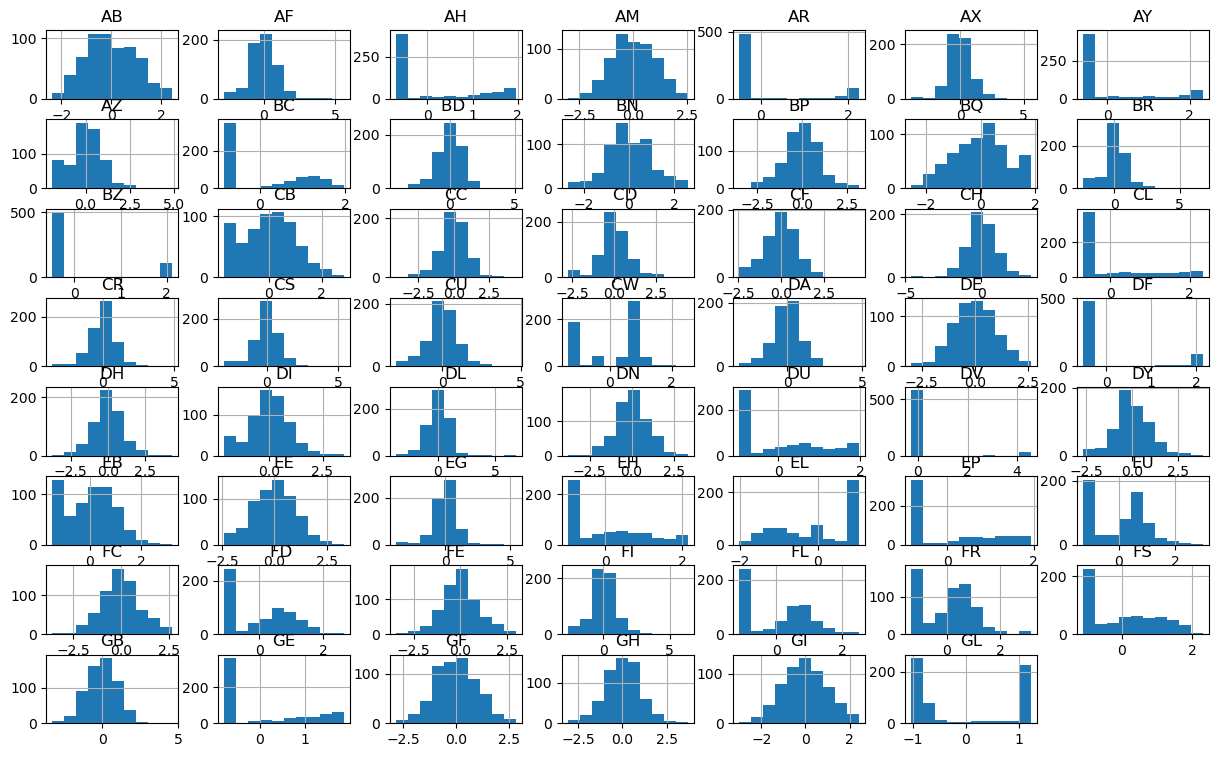

In [10]:
corrected_train_df.hist(figsize=(15, 9));

In [11]:
correlation_df = corrected_train_df.corr().abs()

In [12]:
high_correlations = {}
for col in correlation_df:
    high = correlation_df[col][correlation_df[col] > 0.9]
    if len(high) > 1:
        high_correlations[col] = high
high_correlations

{'EH': EH     1.000000
 FD     0.926746
 Name: EH, dtype: float64,
 'FD ': EH     0.926746
 FD     1.000000
 Name: FD , dtype: float64,
 'FL': FL    1.000000
 GL    0.932752
 Name: FL, dtype: float64,
 'GL': FL    0.932752
 GL    1.000000
 Name: GL, dtype: float64}

In [17]:
corrected_train_df['Class'] = train_df['Class']

In [18]:
corrected_train_df.loc[:, ['EH', 'FD ', 'Class']].corr()

,EH,FD,Class
EH,1.000000,0.926746,0.195611
FD,0.926746,1.000000,0.162301
Class,0.195611,0.162301,1.000000


In [19]:
corrected_train_df.loc[:, ['FL', 'GL', 'Class']].corr()

,FL,GL,Class
FL,1.000000,-0.932752,0.241492
GL,-0.932752,1.000000,-0.152448
Class,0.241492,-0.152448,1.000000
